In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

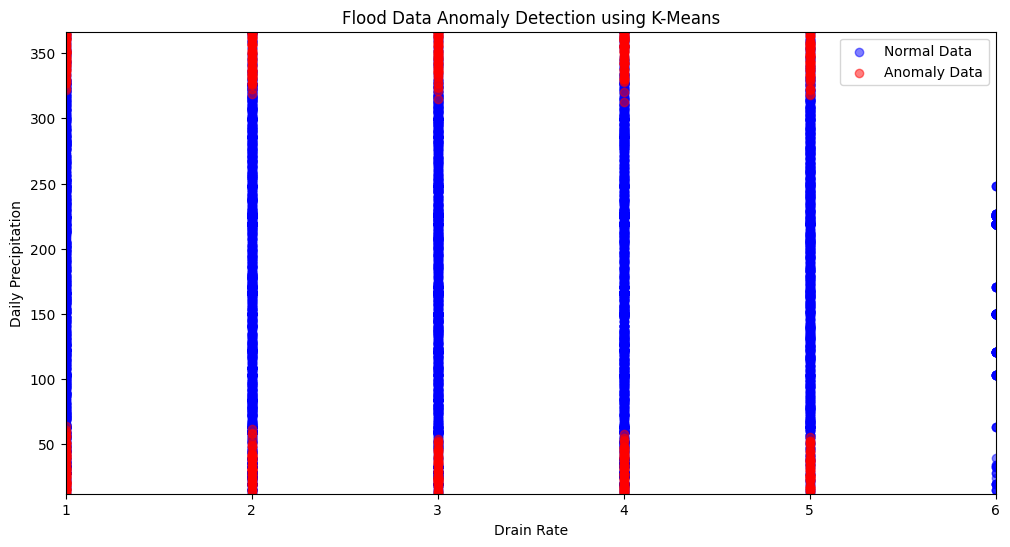

In [82]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 엑셀 파일 로드
file_path = '서울시_침수데이터_좌표포함칼럼정리한버전.xlsx'
data = pd.read_excel(file_path)


# 필요한 컬럼만 선택
input_variables = data[['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량', 'centroid_lon', 'centroid_lat']]
input_variables = input_variables.dropna()

# 2. 더미 데이터 생성
np.random.seed(42)
num_dummy_samples = int(len(input_variables) * 0.7)
dummy_data = {
    '침수된 지역의 평균 지형 고도': np.random.uniform(low=input_variables['침수된 지역의 평균 지형 고도'].min(), high=input_variables['침수된 지역의 평균 지형 고도'].max(), size=num_dummy_samples),
    '배수정보': np.random.randint(low=1, high=6, size=num_dummy_samples),  # 1부터 5 사이의 값으로 설정
    '일별 평균 강수량': np.random.uniform(low=input_variables['일별 평균 강수량'].min(), high=input_variables['일별 평균 강수량'].max(), size=num_dummy_samples),
    'centroid_lon': np.random.uniform(low=126.7, high=127.3, size=num_dummy_samples),
    'centroid_lat': np.random.uniform(low=37.4, high=37.7, size=num_dummy_samples)
}
dummy_df = pd.DataFrame(dummy_data)

# 3. 데이터 병합
combined_data = pd.concat([input_variables, dummy_df], ignore_index=True)

# 4. K-Means 모델 학습 (클러스터 개수 3개로 지정)
kmeans = KMeans(n_clusters=3, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(combined_data[['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']])

# 5. 이상 탐지 예측
# 중심에서 멀리 떨어진 포인트를 이상치로 간주
combined_data['Distance_to_Center'] = kmeans.transform(combined_data[['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']]).min(axis=1)
threshold = combined_data['Distance_to_Center'].quantile(0.95)  # 상위 5%를 이상치로 간주
combined_data['Predicted_Anomaly'] = (combined_data['Distance_to_Center'] > threshold).astype(int)

# 6. drain_rate와 daily_precipitation의 분포 시각화
plt.figure(figsize=(12, 6))

# 정상 데이터 포인트 시각화
plt.scatter(combined_data[combined_data['Predicted_Anomaly'] == 0]['배수정보'],
            combined_data[combined_data['Predicted_Anomaly'] == 0]['일별 평균 강수량'],
            color='blue', alpha=0.5, label='Normal Data')

# 비정상 데이터 포인트 시각화
plt.scatter(combined_data[combined_data['Predicted_Anomaly'] == 1]['배수정보'],
            combined_data[combined_data['Predicted_Anomaly'] == 1]['일별 평균 강수량'],
            color='red', alpha=0.5, label='Anomaly Data')

# x축과 y축 범위 설정
plt.xlim(1, 6)
plt.ylim(input_variables['일별 평균 강수량'].min(), input_variables['일별 평균 강수량'].max())

plt.xlabel('Drain Rate')
plt.ylabel('Daily Precipitation')
plt.title('Flood Data Anomaly Detection using K-Means')
plt.legend()
plt.show()


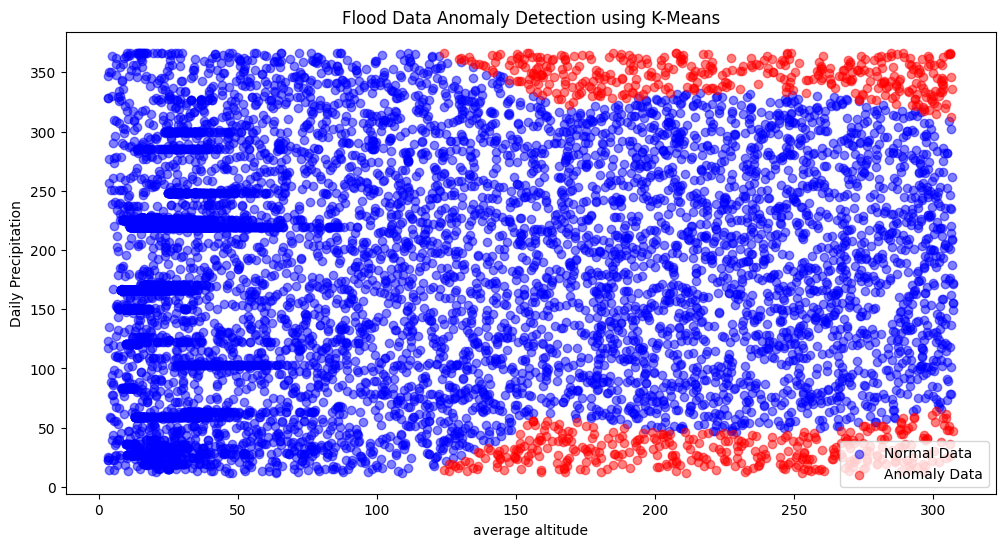

In [83]:
plt.figure(figsize=(12, 6))

# 정상 데이터 포인트 시각화
plt.scatter(combined_data[combined_data['Predicted_Anomaly'] == 0]['침수된 지역의 평균 지형 고도'],
            combined_data[combined_data['Predicted_Anomaly'] == 0]['일별 평균 강수량'],
            color='blue', alpha=0.5, label='Normal Data')

# 비정상 데이터 포인트 시각화
plt.scatter(combined_data[combined_data['Predicted_Anomaly'] == 1]['침수된 지역의 평균 지형 고도'],
            combined_data[combined_data['Predicted_Anomaly'] == 1]['일별 평균 강수량'],
            color='red', alpha=0.5, label='Anomaly Data')




plt.xlabel('average altitude')
plt.ylabel('Daily Precipitation')
plt.title('Flood Data Anomaly Detection using K-Means')
plt.legend()
plt.show()

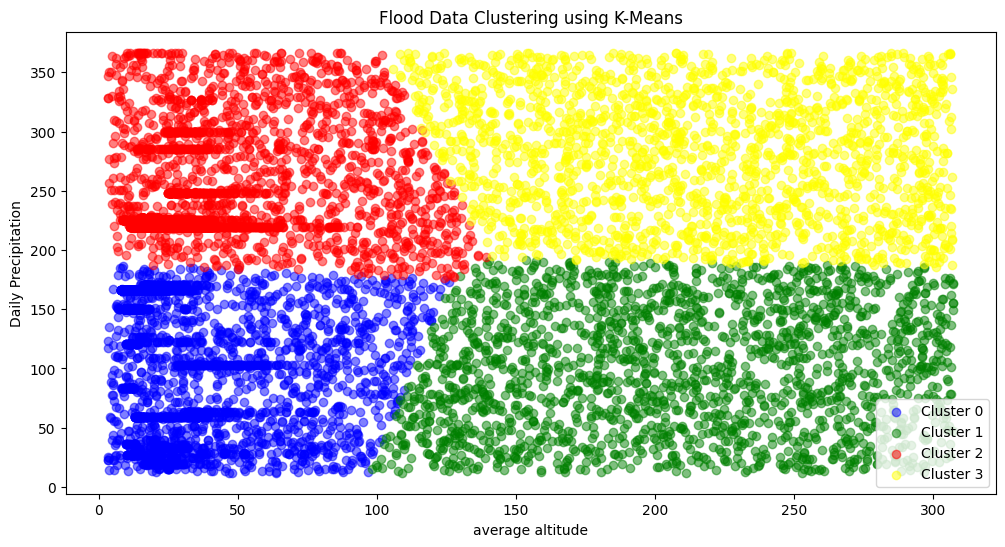

In [84]:
# 4. K-Means 모델 학습 (클러스터 개수 3개로 지정)
kmeans = KMeans(n_clusters=4, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(combined_data[['침수된 지역의 평균 지형 고도', '배수정보', '일별 평균 강수량']])

# 5. 클러스터별로 시각화
plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'red' , 'yellow']
for cluster in range(4):
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    plt.scatter(cluster_data['침수된 지역의 평균 지형 고도'], cluster_data['일별 평균 강수량'], color=colors[cluster], alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('average altitude')
plt.ylabel('Daily Precipitation')
plt.title('Flood Data Clustering using K-Means')
plt.legend()
plt.show()

